**EDA of NYC's Yellow Taxi Trip Records from 2020**

https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import fastparquet
import warnings
warnings.filterwarnings('ignore')

**Looking for issues in the data and finding correlations among the variables in order to improve ride time predictions.**

In [2]:
jan2020_taxis = pd.read_parquet('yellow_tripdata_2020-01.parquet', engine = 'fastparquet')
march2020_taxis = pd.read_parquet('yellow_tripdata_2020-03.parquet', engine = 'fastparquet')
may2020_taxis = pd.read_parquet('yellow_tripdata_2020-05.parquet', engine = 'fastparquet')

In [3]:
march_may_2020 = pd.concat([march2020_taxis, may2020_taxis])

In [4]:
# pip install tensorflow_data_validation

In [5]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_data_validation as tfdv

**Prepping the data to feed it into a model.**

In [6]:
march_may_2020.shape

(3356102, 19)

In [7]:
march_may_2020.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1,22.0,3.0,0.5,2.00,0.0,0.3,27.80,2.5,NaN
1,2,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.00,1.0,N,193,193,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0,NaN
2,1,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,N,246,90,1,6.0,3.0,0.5,1.95,0.0,0.3,11.75,2.5,NaN
3,2,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,N,151,238,1,5.0,0.5,0.5,1.76,0.0,0.3,10.56,2.5,NaN
4,1,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,1.0,N,79,261,1,16.5,3.0,0.5,4.05,0.0,0.3,24.35,2.5,NaN


In [8]:
bouroughs_dict = {2: 'Queens', 27: 'Queens', 201: 'Queens', 117: 'Queens', 86: 'Queens', 30: 'Queens', 132: 'Queens',
                  124: 'Queens', 180: 'Queens', 216: 'Queens', 10: 'Queens', 218: 'Queens', 219: 'Queens', 203: 'Queens',
                  139: 'Queens', 38: 'Queens', 205: 'Queens', 215: 'Queens', 258: 'Queens', 197: 'Queens', 130: 'Queens',
                  122: 'Queens', 191: 'Queens', 19: 'Queens', 101: 'Queens', 64: 'Queens', 175: 'Queens', 98: 'Queens',
                  131: 'Queens', 28: 'Queens', 134: 'Queens', 96: 'Queens', 102: 'Queens', 198: 'Queens', 160: 'Queens',
                  157: 'Queens', 226: 'Queens', 146: 'Queens', 145: 'Queens', 193: 'Queens', 7: 'Queens', 8: 'Queens',
                  179: 'Queens', 223: 'Queens', 207: 'Queens', 138: 'Queens', 129: 'Queens', 260: 'Queens',
                  83: 'Queens', 82: 'Queens', 196: 'Queens', 95: 'Queens', 56: 'Queens', 93: 'Queens', 135: 'Queens',
                  192: 'Queens', 92: 'Queens', 253: 'Queens', 73: 'Queens', 53: 'Queens', 252: 'Queens', 15: 'Queens',
                  16: 'Queens', 9: 'Queens', 121: 'Queens', 173: 'Queens', 70: 'Queens', 171: 'Queens', 57: 'Queens',
                  153: 'Manhattan', 128: 'Manhattan', 127: 'Manhattan', 243: 'Manhattan', 120: 'Manhattan',
                  244: 'Manhattan', 116: 'Manhattan', 42: 'Manhattan', 152: 'Manhattan', 166: 'Manhattan',
                  41: 'Manhattan', 74: 'Manhattan', 194: 'Manhattan', 24: 'Manhattan', 151: 'Manhattan', 75: 'Manhattan',
                  238: 'Manhattan', 239: 'Manhattan', 43: 'Manhattan', 236: 'Manhattan', 263: 'Manhattan', 262: 'Manhattan',
                  143: 'Manhattan', 142: 'Manhattan', 202: 'Manhattan', 237: 'Manhattan', 141: 'Manhattan', 140: 'Manhattan',
                  50: 'Manhattan', 48: 'Manhattan', 230: 'Manhattan', 163: 'Manhattan', 161: 'Manhattan', 162: 'Manhattan',
                  229: 'Manhattan', 233: 'Manhattan', 100: 'Manhattan', 170: 'Manhattan', 246: 'Manhattan', 68: 'Manhattan',
                  90: 'Manhattan', 186: 'Manhattan', 234: 'Manhattan', 164: 'Manhattan', 107: 'Manhattan',
                  137: 'Manhattan', 224: 'Manhattan', 4: 'Manhattan', 79: 'Manhattan', 232: 'Manhattan', 144: 'Manhattan',
                  148: 'Manhattan', 114: 'Manhattan', 113: 'Manhattan', 211: 'Manhattan', 125: 'Manhattan', 158: 'Manhattan',
                  249: 'Manhattan', 231: 'Manhattan', 45: 'Manhattan', 13: 'Manhattan', 261: 'Manhattan', 87: 'Manhattan',
                  209: 'Manhattan', 12: 'Manhattan', 88: 'Manhattan', 105: 'Manhattan', 104: 'Manhattan', 103: 'Manhattan',
                  112: 'Brooklyn', 255: 'Brooklyn', 256: 'Brooklyn', 80: 'Brooklyn', 217: 'Brooklyn', 17: 'Brooklyn',
                  225: 'Brooklyn', 36: 'Brooklyn', 37: 'Brooklyn', 61: 'Brooklyn', 177: 'Brooklyn', 77: 'Brooklyn',
                  35: 'Brooklyn', 72: 'Brooklyn', 63: 'Brooklyn', 76: 'Brooklyn', 222: 'Brooklyn', 39: 'Brooklyn',
                  188: 'Brooklyn', 62: 'Brooklyn', 49: 'Brooklyn', 97: 'Brooklyn', 34: 'Brooklyn', 66: 'Brooklyn',
                  65: 'Brooklyn', 33: 'Brooklyn', 25: 'Brooklyn', 54: 'Brooklyn', 52: 'Brooklyn', 195: 'Brooklyn',
                  40: 'Brooklyn', 106: 'Brooklyn', 181: 'Brooklyn', 189: 'Brooklyn', 190: 'Brooklyn', 257: 'Brooklyn',
                  111: 'Brooklyn', 228: 'Brooklyn', 227: 'Brooklyn', 26: 'Brooklyn', 14: 'Brooklyn', 67: 'Brooklyn',
                  22: 'Brooklyn', 11: 'Brooklyn', 21: 'Brooklyn', 108: 'Brooklyn', 55: 'Brooklyn', 29: 'Brooklyn',
                  150: 'Brooklyn', 154: 'Brooklyn', 210: 'Brooklyn', 123: 'Brooklyn', 149: 'Brooklyn', 155: 'Brooklyn',
                  91: 'Brooklyn', 71: 'Brooklyn', 85: 'Brooklyn', 89: 'Brooklyn', 133: 'Brooklyn',  178: 'Brooklyn',
                  165: 'Brooklyn', 200: 'Bronx', 240: 'Bronx', 220: 'Bronx', 241: 'Bronx', 174: 'Bronx', 254: 'Bronx',
                  259: 'Bronx', 81: 'Bronx', 51: 'Bronx', 184: 'Bronx', 46: 'Bronx', 3: 'Bronx', 32: 'Bronx', 31: 'Bronx',
                  20: 'Bronx', 18: 'Bronx', 136: 'Bronx', 94: 'Bronx', 235: 'Bronx', 169: 'Bronx', 119: 'Bronx', 47: 'Bronx',
                  69: 'Bronx', 247: 'Bronx', 167: 'Bronx', 159: 'Bronx', 168: 'Bronx', 126: 'Bronx', 199: 'Bronx',
                  147: 'Bronx', 60: 'Bronx', 213: 'Bronx', 212: 'Bronx', 78: 'Bronx', 250: 'Bronx', 182: 'Bronx',
                  59: 'Bronx',248: 'Bronx', 185: 'Bronx', 242: 'Bronx', 183: 'Bronx', 208: 'Bronx', 58: 'Bronx',
                  156: 'Staten Island', 23: 'Staten Island', 187:'Staten Island', 251: 'Staten Island', 245: 'Staten Island',
                  206: 'Staten Island', 115: 'Staten Island', 221: 'Staten Island', 6: 'Staten Island', 214: 'Staten Island',
                  172: 'Staten Island', 176: 'Staten Island', 110: 'Staten Island', 109: 'Staten Island', 84: 'Staten Island',
                  44: 'Staten Island', 204: 'Staten Island', 5: 'Staten Island', 99: 'Staten Island', 118: 'Staten Island'}

In [9]:
march_may_2020['starting_burough'] = march_may_2020['PULocationID'].map(bouroughs_dict)
march_may_2020['ending_burough'] = march_may_2020['DOLocationID'].map(bouroughs_dict)

march_may_2020['starting_burough'].fillna('Unknown', inplace = True)
march_may_2020['ending_burough'].fillna('Unknown', inplace = True)
march_may_2020.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,starting_burough,ending_burough
0,1,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1,...,3.0,0.5,2.00,0.0,0.3,27.80,2.5,NaN,Manhattan,Brooklyn
1,2,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.00,1.0,N,193,193,2,...,0.5,0.5,0.00,0.0,0.3,3.80,0.0,NaN,Queens,Queens
2,1,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,N,246,90,1,...,3.0,0.5,1.95,0.0,0.3,11.75,2.5,NaN,Manhattan,Manhattan
3,2,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,N,151,238,1,...,0.5,0.5,1.76,0.0,0.3,10.56,2.5,NaN,Manhattan,Manhattan
4,1,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,1.0,N,79,261,1,...,3.0,0.5,4.05,0.0,0.3,24.35,2.5,NaN,Manhattan,Manhattan


In [10]:
march_may_2020['p_hour'] = pd.DatetimeIndex(march_may_2020['tpep_pickup_datetime']).hour
march_may_2020['p_day'] = pd.DatetimeIndex(march_may_2020['tpep_pickup_datetime']).day
march_may_2020['p_month'] = pd.DatetimeIndex(march_may_2020['tpep_pickup_datetime']).month
march_may_2020['p_year'] = pd.DatetimeIndex(march_may_2020['tpep_pickup_datetime']).year

march_may_2020['d_hour'] = pd.DatetimeIndex(march_may_2020['tpep_dropoff_datetime']).hour
march_may_2020['d_day'] = pd.DatetimeIndex(march_may_2020['tpep_dropoff_datetime']).day
march_may_2020['d_month'] = pd.DatetimeIndex(march_may_2020['tpep_dropoff_datetime']).month
march_may_2020['d_year'] = pd.DatetimeIndex(march_may_2020['tpep_dropoff_datetime']).year

march_may_2020.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,starting_burough,ending_burough,p_hour,p_day,p_month,p_year,d_hour,d_day,d_month,d_year
0,1,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1,...,Manhattan,Brooklyn,0,1,3,2020,1,1,3,2020
1,2,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.00,1.0,N,193,193,2,...,Queens,Queens,0,1,3,2020,0,1,3,2020
2,1,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,N,246,90,1,...,Manhattan,Manhattan,0,1,3,2020,0,1,3,2020
3,2,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,N,151,238,1,...,Manhattan,Manhattan,0,1,3,2020,0,1,3,2020
4,1,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,1.0,N,79,261,1,...,Manhattan,Manhattan,0,1,3,2020,0,1,3,2020


In [11]:
print(march_may_2020['p_year'].nsmallest(5))

493113     2008
571074     2008
1442027    2008
1645605    2008
2370152    2008
Name: p_year, dtype: int64


In [12]:
march_may_2020 = march_may_2020.drop(march_may_2020[march_may_2020.p_year == 2008].index)
march_may_2020 = march_may_2020.drop(march_may_2020[march_may_2020.p_year == 2009].index)
print(march_may_2020['p_year'].nsmallest(5))

0    2020
1    2020
2    2020
3    2020
4    2020
Name: p_year, dtype: int64


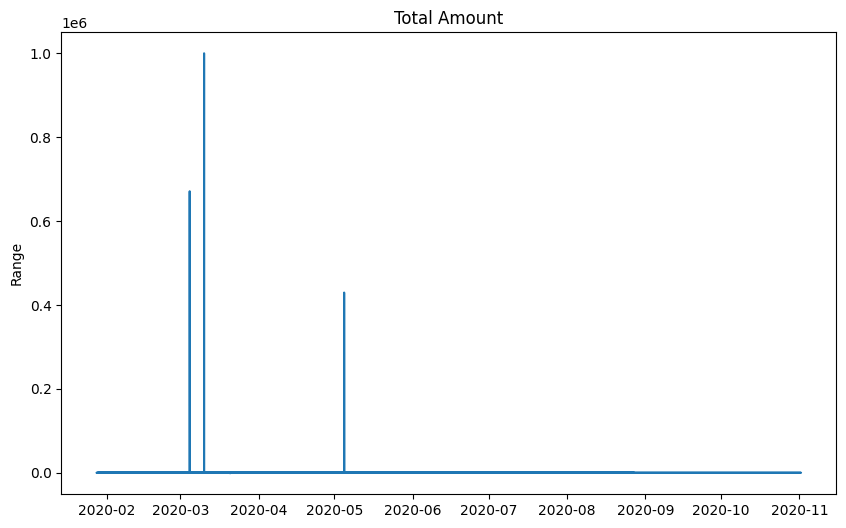

In [13]:
plt.figure(figsize=(10,6))
plt.plot(march_may_2020['tpep_pickup_datetime'], march_may_2020['total_amount'])
plt.title('Total Amount')
plt.ylabel('Range')
plt.show()

**Looking for missing, null, NaN records.**

Utilizing TFDV (TensorFlow Data Validation) with the powerful graphical statistics generated (apache beam library…).

In [14]:
train_stats = tfdv.generate_statistics_from_dataframe(march_may_2020)
tfdv.visualize_statistics(train_stats)

In [15]:
march_may_2020 = march_may_2020.drop(['airport_fee'], axis = 1)
march_may_2020.store_and_fwd_flag.value_counts()

N    3228559
Y      30808
Name: store_and_fwd_flag, dtype: int64

In [16]:
march_may_2020['store_and_fwd_flag'].replace({'N': 0, 'Y': 1}, inplace = True)

In [17]:
borough_names = march_may_2020.copy()

march_may_2020['starting_burough'].replace({'Manhattan': 1, 'Brooklyn': 2, 'Queens': 3, 'Bronx': 4, 'Staten Island': 5, 'Unknown': 6}, inplace = True)
march_may_2020['ending_burough'].replace({'Manhattan': 1, 'Brooklyn': 2, 'Queens': 3, 'Bronx': 4, 'Staten Island': 5, 'Unknown': 6}, inplace = True)

In [18]:
march_may_2020.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          96709
trip_distance                0
RatecodeID               96709
store_and_fwd_flag       96709
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     96709
starting_burough             0
ending_burough               0
p_hour                       0
p_day                        0
p_month                      0
p_year                       0
d_hour                       0
d_day                        0
d_month                      0
d_year                       0
dtype: int64

**Transform data so all entries are numeric.**

In [19]:
from datetime import datetime
march_may_2020['ride_in_mins'] = pd.Series(map(lambda x: (x.seconds) / 60, (march_may_2020['tpep_dropoff_datetime'] - march_may_2020['tpep_pickup_datetime'])))

In [20]:
march_may_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356076 entries, 0 to 348414
Data columns (total 29 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     float64       
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  starting_burough       

In [21]:
march_may_2020.nunique()

VendorID                       4
tpep_pickup_datetime     1528556
tpep_dropoff_datetime    1529240
passenger_count               10
trip_distance               4251
RatecodeID                     7
store_and_fwd_flag             2
PULocationID                 262
DOLocationID                 261
payment_type                   5
fare_amount                 7817
extra                        309
mta_tax                        7
tip_amount                  3115
tolls_amount                 714
improvement_surcharge          3
total_amount               11865
congestion_surcharge           6
starting_burough               6
ending_burough                 6
p_hour                        24
p_day                         31
p_month                       11
p_year                         1
d_hour                        24
d_day                         31
d_month                       11
d_year                         1
ride_in_mins                9831
dtype: int64

**Finding outliers.**

In [22]:
march_may_2020.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,3356076.0,1.667638,0.474298,1.00,1.000000,2.000000,2.000000,6.000000e+00
passenger_count,3259367.0,1.453860,1.109531,0.00,1.000000,1.000000,1.000000,9.000000e+00
trip_distance,3356076.0,3.658543,317.331329,0.00,1.000000,1.700000,3.120000,2.970045e+05
RatecodeID,3259367.0,1.050638,0.737568,1.00,1.000000,1.000000,1.000000,9.900000e+01
store_and_fwd_flag,3259367.0,0.009452,0.096762,0.00,0.000000,0.000000,0.000000,1.000000e+00
PULocationID,3356076.0,162.305449,67.124655,1.00,114.000000,161.000000,233.000000,2.650000e+02
DOLocationID,3356076.0,159.641280,71.276359,1.00,107.000000,161.000000,234.000000,2.650000e+02
payment_type,3356076.0,1.244622,0.524681,0.00,1.000000,1.000000,2.000000,4.000000e+00
fare_amount,3356076.0,12.930601,435.079146,-1259.00,6.500000,9.000000,14.000000,6.711001e+05
extra,3356076.0,1.216663,272.934477,-7.00,0.000000,0.500000,2.500000,5.000008e+05


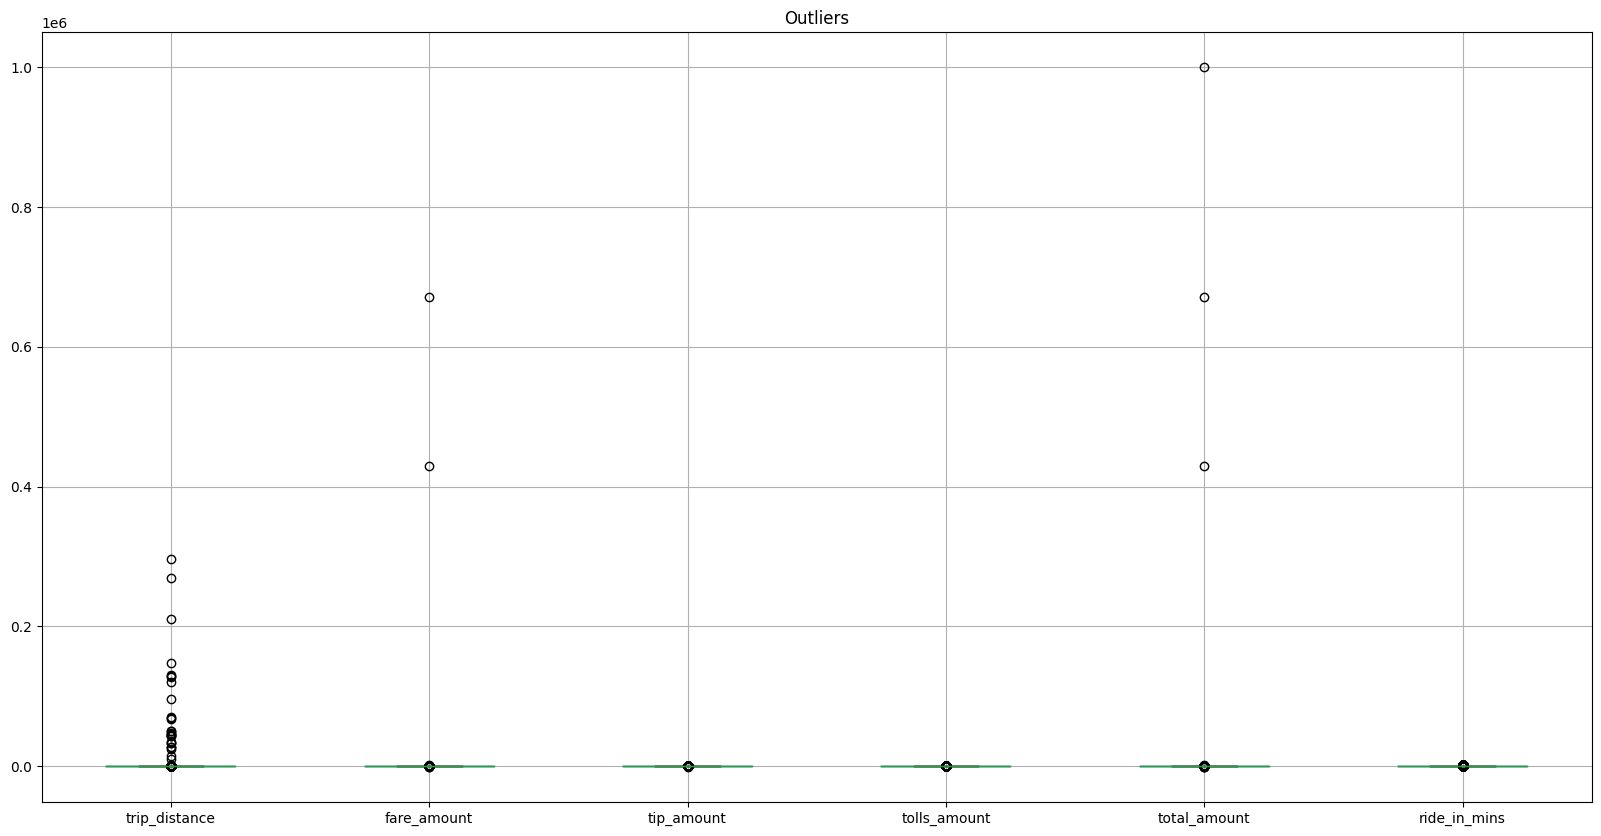

In [23]:
plt.subplots(figsize=(20,10))
plt.title('Outliers')
boxplot = march_may_2020.boxplot(column = ['trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount', 'ride_in_mins'])

In [24]:
Q1 = march_may_2020[['trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount', 'ride_in_mins']].quantile(0.25)

print('Q1: \n', Q1)

Q1: 
 trip_distance     1.000000
fare_amount       6.500000
tip_amount        0.000000
tolls_amount      0.000000
total_amount     11.150000
ride_in_mins      6.233333
Name: 0.25, dtype: float64


In [25]:
Q3 = march_may_2020[['trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount', 'ride_in_mins']].quantile(0.75)

print('Q3: \n', Q3)

Q3: 
 trip_distance     3.120000
fare_amount      14.000000
tip_amount        2.800000
tolls_amount      0.000000
total_amount     20.150000
ride_in_mins     16.766667
Name: 0.75, dtype: float64


In [26]:
IQR = Q3 - Q1
print('IQR: \n', IQR)

IQR: 
 trip_distance     2.120000
fare_amount       7.500000
tip_amount        2.800000
tolls_amount      0.000000
total_amount      9.000000
ride_in_mins     10.533333
dtype: float64


In [27]:
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)

print(lower_range)
print(upper_range)

trip_distance   -2.180000
fare_amount     -4.750000
tip_amount      -4.200000
tolls_amount     0.000000
total_amount    -2.350000
ride_in_mins    -9.566667
dtype: float64
trip_distance     6.300000
fare_amount      25.250000
tip_amount        7.000000
tolls_amount      0.000000
total_amount     33.650000
ride_in_mins     32.566667
dtype: float64


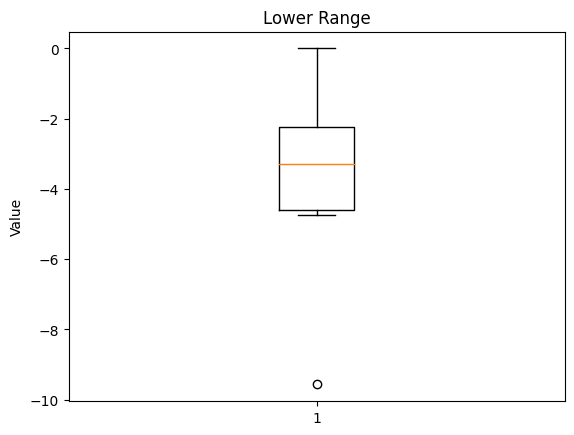

In [28]:
plt.boxplot(lower_range)
plt.title('Lower Range')
plt.ylabel('Value')
plt.show()

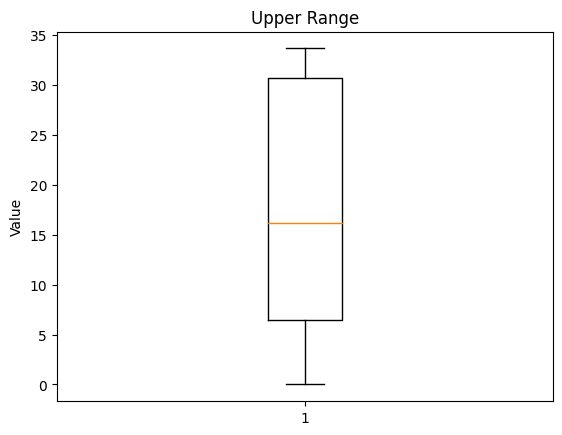

In [29]:
plt.boxplot(upper_range)
plt.title('Upper Range')
plt.ylabel('Value')
plt.show()

In [30]:
print(march_may_2020['total_amount'].nlargest(5))

1880017    1000003.80
732292      671103.17
30597       429562.25
2848144       1260.30
133229        1042.82
Name: total_amount, dtype: float64


In [31]:
march_may_2020 = march_may_2020.drop(march_may_2020[march_may_2020.total_amount >= 1000].index)
print(march_may_2020['total_amount'].nlargest(5))

39290      950.30
279198     846.29
1755345    840.35
39293      840.35
39294      840.35
Name: total_amount, dtype: float64


In [32]:
print(march_may_2020['trip_distance'].nlargest(5))

291788     297004.51
2973275    269803.73
2978212    210148.62
310208     148342.26
328045     130587.13
Name: trip_distance, dtype: float64


In [33]:
march_may_2020 = march_may_2020.drop(march_may_2020[march_may_2020.trip_distance >= 1000].index)
print(march_may_2020['trip_distance'].nlargest(5))

50776      238.00
2935972    233.69
2965073    230.00
1585323    226.60
8826       223.70
Name: trip_distance, dtype: float64


In [34]:
print(march_may_2020['fare_amount'].nlargest(5))

39290      950.0
279198     819.5
826651     750.0
1755345    700.0
2779911    700.0
Name: fare_amount, dtype: float64


In [35]:
march_may_2020 = march_may_2020.drop(march_may_2020[march_may_2020.fare_amount >= 500].index)
print(march_may_2020['fare_amount'].nlargest(5))

127229     499.4
2902403    499.0
2916799    499.0
256792     496.5
127985     494.2
Name: fare_amount, dtype: float64


In [36]:
print(march_may_2020['tip_amount'].nlargest(5))

1534781    800.00
563163     493.22
535580     445.50
199716     442.18
283489     400.04
Name: tip_amount, dtype: float64


In [37]:
march_may_2020 = march_may_2020.drop(march_may_2020[march_may_2020.tip_amount >= 300].index)
print(march_may_2020['tip_amount'].nlargest(5))

2784149    287.00
1672059    250.00
2881590    240.01
1283948    222.11
2747220    213.64
Name: tip_amount, dtype: float64


In [38]:
print(march_may_2020['tolls_amount'].nlargest(5))

2081703    601.02
1318158    600.04
37935      221.87
76501      200.00
1610753    102.24
Name: tolls_amount, dtype: float64


In [39]:
march_may_2020 = march_may_2020.drop(march_may_2020[march_may_2020.tolls_amount >= 100].index)
print(march_may_2020['tolls_amount'].nlargest(5))

223778     99.12
2935055    98.00
1518300    97.90
51651      96.12
322280     96.12
Name: tolls_amount, dtype: float64


In [40]:
print(march_may_2020['ride_in_mins'].nlargest(5))

2634574    1439.983333
2985080    1439.983333
2985750    1439.983333
2993851    1439.983333
3001581    1439.983333
Name: ride_in_mins, dtype: float64


In [41]:
march_may_2020 = march_may_2020.drop(march_may_2020[march_may_2020.ride_in_mins >= 500].index)
print(march_may_2020['ride_in_mins'].nlargest(5))

2128748    490.816667
2122476    486.000000
115573     484.166667
115573     484.166667
705398     483.750000
Name: ride_in_mins, dtype: float64


In [42]:
march_may_2020.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,3349539.0,1.667598,0.474274,1.00,1.000000,2.00,2.00,6.000000
passenger_count,3253094.0,1.453814,1.109462,0.00,1.000000,1.00,1.00,9.000000
trip_distance,3349539.0,2.968633,3.796301,0.00,1.000000,1.70,3.12,233.690000
RatecodeID,3253094.0,1.050497,0.731958,1.00,1.000000,1.00,1.00,99.000000
store_and_fwd_flag,3253094.0,0.009455,0.096776,0.00,0.000000,0.00,0.00,1.000000
PULocationID,3349539.0,162.306231,67.124988,1.00,114.000000,161.00,233.00,265.000000
DOLocationID,3349539.0,159.644167,71.274834,1.00,107.000000,161.00,234.00,265.000000
payment_type,3349539.0,1.244640,0.524630,0.00,1.000000,1.00,2.00,4.000000
fare_amount,3349539.0,12.594761,11.630493,-1259.00,6.500000,9.00,14.00,499.400000
extra,3349539.0,1.067772,1.244974,-7.00,0.000000,0.50,2.50,30.300000


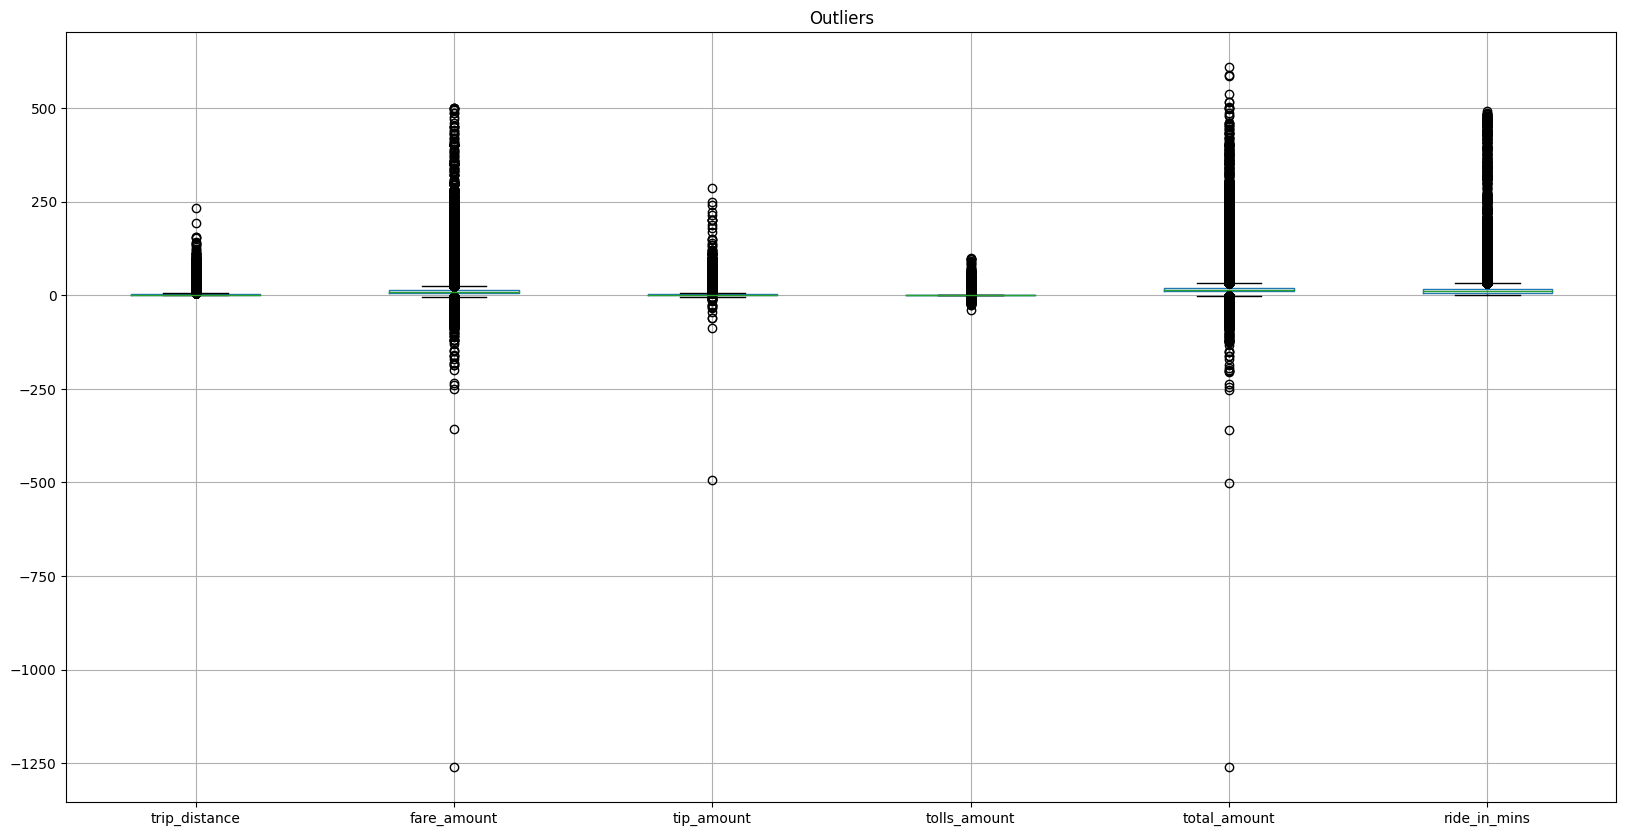

In [43]:
plt.subplots(figsize=(20,10))
plt.title('Outliers')
boxplot = march_may_2020.boxplot(column = ['trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount', 'ride_in_mins'])

In [44]:
march_may_2020.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag              float64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
starting_burough                  int64
ending_burough                    int64
p_hour                            int64
p_day                             int64
p_month                           int64
p_year                            int64
d_hour                            int64


**Presenting dependencies and correlations among the various features in the data.**

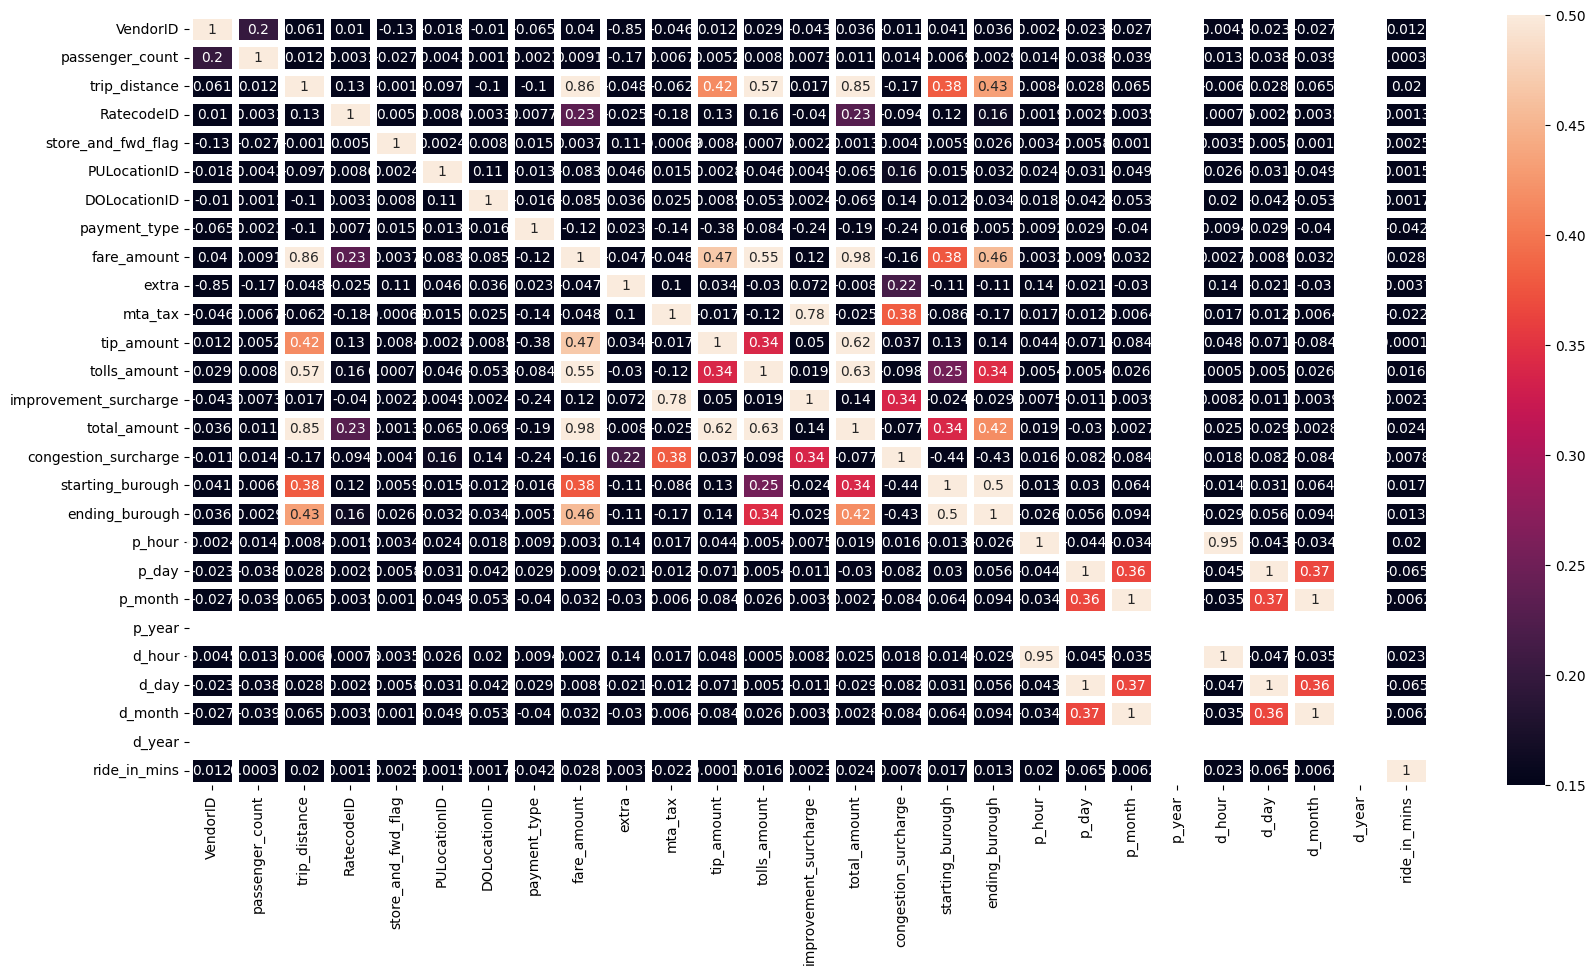

In [45]:
plt.figure(figsize=(20,10))
sns.heatmap(march_may_2020.corr(), linewidths=5, vmin=0.15, vmax=0.5, annot=True)
plt.yticks(rotation=0);

**List feature importance.**

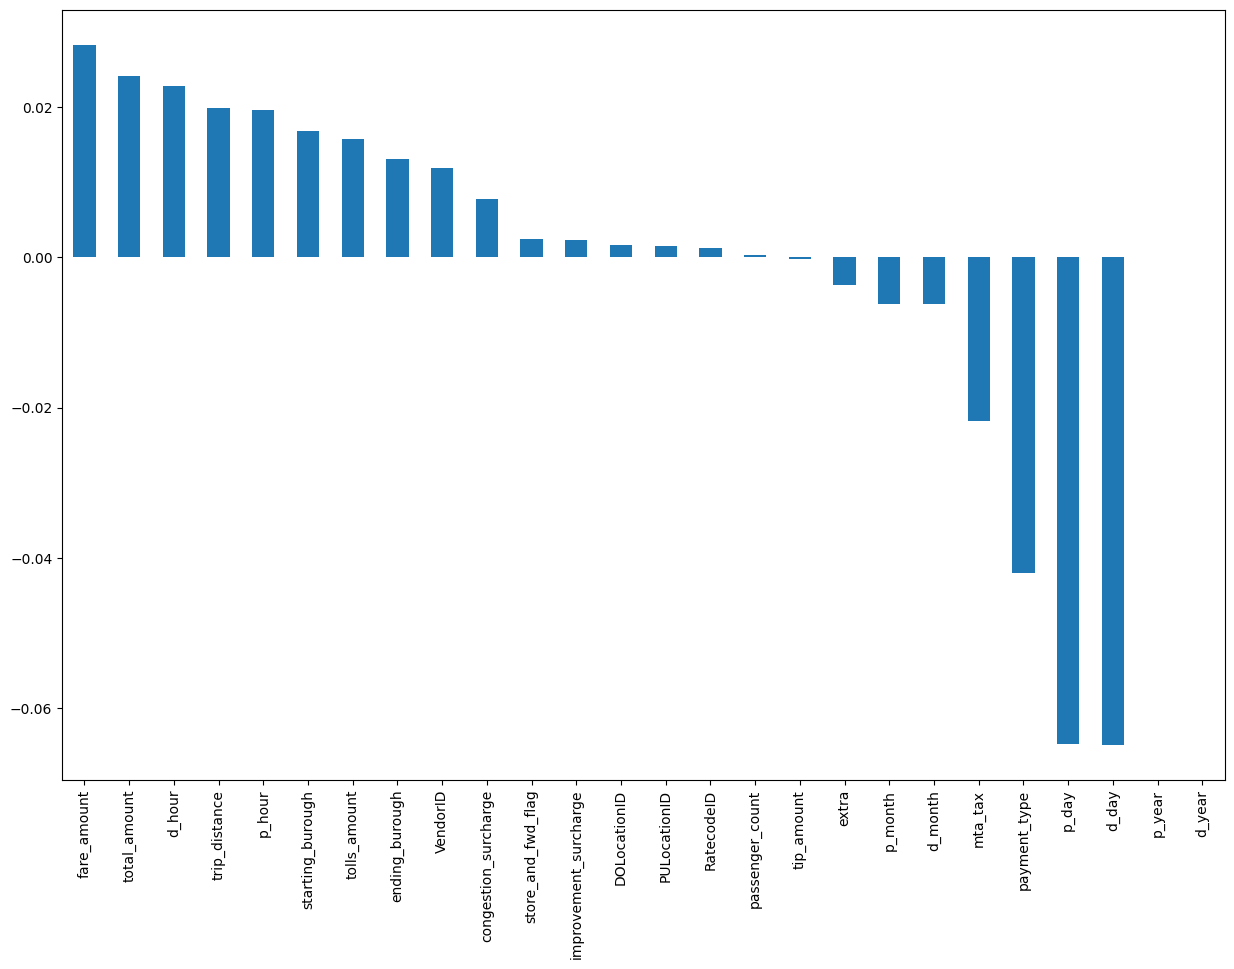

In [46]:
plt.figure(figsize = (15, 10))
march_may_2020.corr()['ride_in_mins'].sort_values(ascending = False)[1:].plot(kind = 'bar');

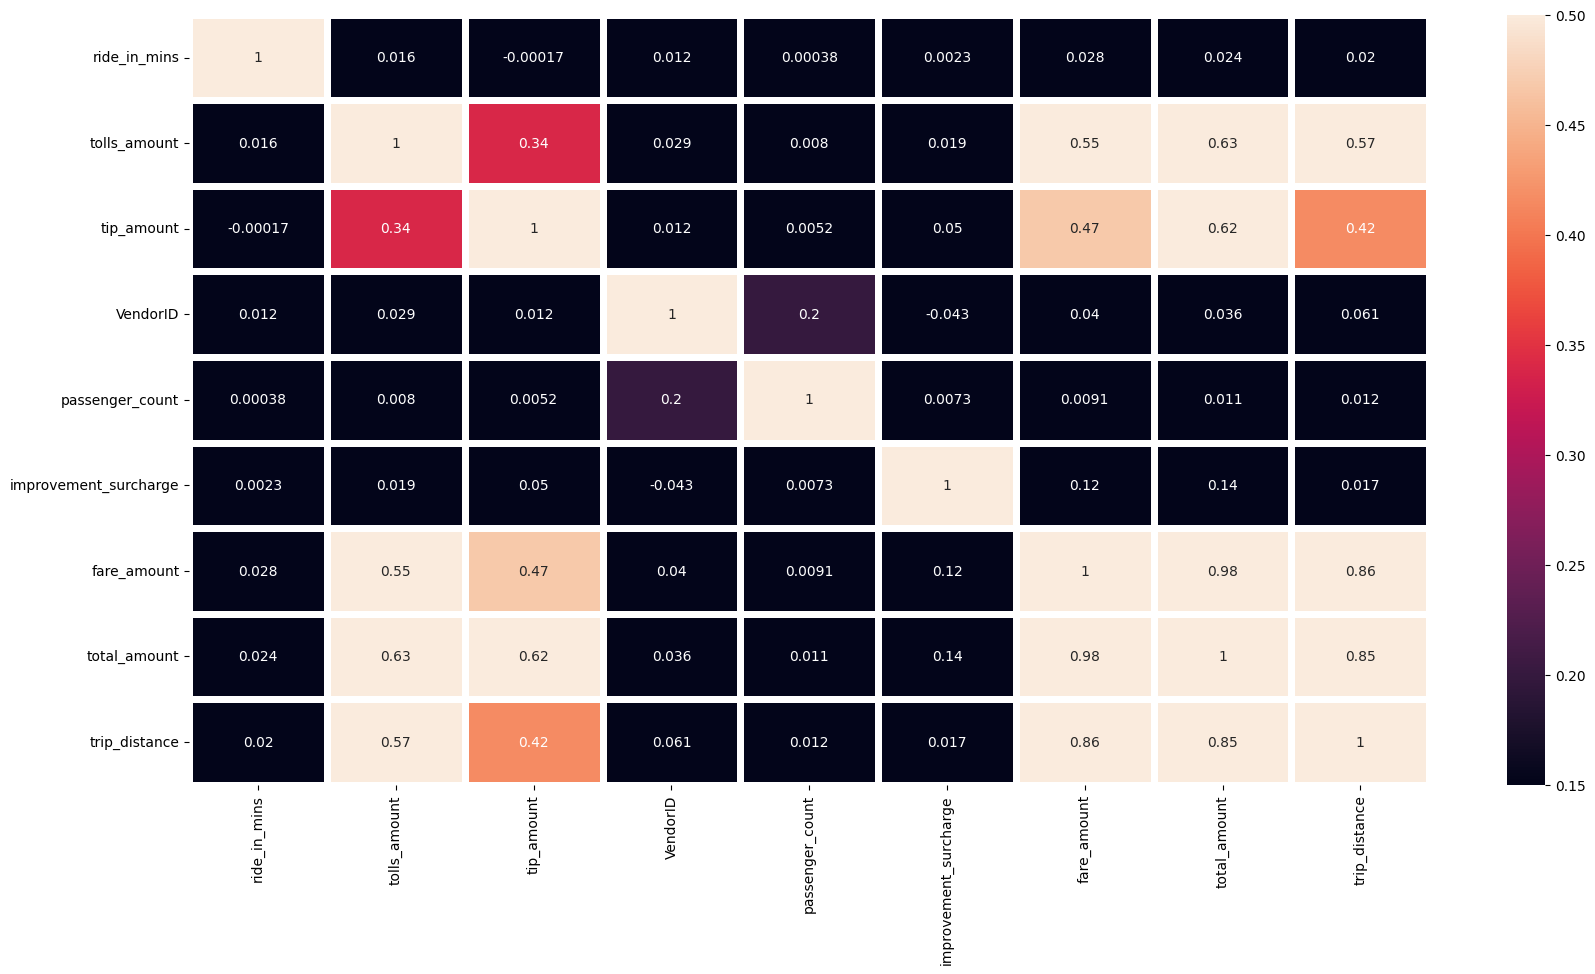

In [47]:
plt.figure(figsize=(20,10))
sns.heatmap(march_may_2020[['ride_in_mins', 'tolls_amount', 'tip_amount', 'VendorID', 'passenger_count',
                               'improvement_surcharge', 'fare_amount', 'total_amount', 'trip_distance']].corr(),
            linewidths = 5, vmin = 0.15, vmax = 0.5, annot = True)
plt.yticks(rotation = 0);

**January 2020 data presents the ‘baseline’ of what the NYC Taxi business used to be. Compare the data of Jan 2020 to Mar 2020 and present your findings.**

In [48]:
jan2020_taxis = jan2020_taxis.drop(['RatecodeID', 'store_and_fwd_flag', 'airport_fee'], axis = 1)
jan2020_taxis.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,238,239,1,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,239,238,1,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,238,238,1,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,238,151,1,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


**Analysis**

In [49]:
X = march_may_2020.drop(['ride_in_mins'], axis = 1)
y = march_may_2020['ride_in_mins']

In [50]:
X = march_may_2020.iloc[:, : -1].values
y = march_may_2020.iloc[:, -1].values

In [51]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(march_may_2020, test_size = 0.20, random_state = 0)

print(train.shape)
print(test.shape)

(2679631, 29)
(669908, 29)


In [52]:
pip install sweetviz

In [53]:
import sweetviz as sv
sv.compare(train, test).show_html("Compare.html")

                                             |          | [  0%]   00:00 -> (? left)

Report Compare.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
